<a href="https://colab.research.google.com/github/Htets-Corner/SYNTHBUSTER_RAISE-1k/blob/main/synthbuter_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 0: Mount Drive and Import Libraries

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import core libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Torch and torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# Utilities
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


Mounted at /content/drive


In [ ]:
# Step 1: Prepare dataset loaders and save structured dataset into Drive (resumable)

import os
import shutil
import random
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths to original datasets in your Drive
real_path = "/content/drive/MyDrive/RAISE/PNG"
ai_path = "/content/drive/MyDrive/SYNTHBUSTER_32"

# Destination structured dataset root (inside Drive)
dataset_root = "/content/drive/MyDrive/Binary_Dataset"
train_dir = os.path.join(dataset_root, "train")
test_dir = os.path.join(dataset_root, "test")

# Create folders
for split in ["train", "test"]:
    for cls in ["real", "ai"]:
        os.makedirs(os.path.join(dataset_root, split, cls), exist_ok=True)

# --- Handle real dataset (flat folder of PNGs) ---
real_images = os.listdir(real_path)
random.shuffle(real_images)

split_idx = int(0.8 * len(real_images))
train_real, test_real = real_images[:split_idx], real_images[split_idx:]

# Copy real train images (skip if exists)
for img in tqdm(train_real, desc="Copying Real Train"):
    dst = os.path.join(train_dir, "real", img)
    if not os.path.exists(dst):
        shutil.copy(os.path.join(real_path, img), dst)

# Copy real test images (skip if exists)
for img in tqdm(test_real, desc="Copying Real Test"):
    dst = os.path.join(test_dir, "real", img)
    if not os.path.exists(dst):
        shutil.copy(os.path.join(real_path, img), dst)

# --- Handle AI dataset (9 subfolders with JPGs) ---
ai_folders = [os.path.join(ai_path, f) for f in os.listdir(ai_path) if os.path.isdir(os.path.join(ai_path, f))]
ai_images = []
for folder in ai_folders:
    imgs = [os.path.join(folder, x) for x in os.listdir(folder)]
    ai_images.extend(imgs)

random.shuffle(ai_images)

split_idx = int(0.8 * len(ai_images))
train_ai, test_ai = ai_images[:split_idx], ai_images[split_idx:]

# Copy AI train images (skip if exists)
for img in tqdm(train_ai, desc="Copying AI Train"):
    dst = os.path.join(train_dir, "ai", os.path.basename(img))
    if not os.path.exists(dst):
        shutil.copy(img, dst)

# Copy AI test images (skip if exists)
for img in tqdm(test_ai, desc="Copying AI Test"):
    dst = os.path.join(test_dir, "ai", os.path.basename(img))
    if not os.path.exists(dst):
        shutil.copy(img, dst)

print("✅ Dataset structured successfully and saved in Google Drive at:", dataset_root)

# --- Define transforms ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Create datasets & loaders ---
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Train set size: {len(train_dataset)} images")
print(f"Test set size: {len(test_dataset)} images")
print(f"Classes: {train_dataset.classes}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying AI Test: 100%|██████████| 1800/1800 [05:53<00:00,  5.09it/s]

✅ Dataset structured successfully and saved in Google Drive at: /content/drive/MyDrive/Binary_Dataset
Train set size: 1799 images
Test set size: 1071 images
Classes: ['ai', 'real']


In [7]:
# Real Usage Step 1: Prepare dataset loaders and save structured dataset into Drive (resumable + unique filenames)

import os
import shutil
import random
from tqdm import tqdm
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

# Paths to original datasets in your Drive
real_path = "/content/drive/MyDrive/RAISE/PNG"
ai_path = "/content/drive/MyDrive/synthbuster"

# Destination structured dataset root (inside Drive)
dataset_root = "/content/drive/MyDrive/Dataset"   # <-- matches your log
train_dir = os.path.join(dataset_root, "train")
test_dir = os.path.join(dataset_root, "test")

# Create folders
for split in ["train", "test"]:
    for cls in ["real", "ai"]:
        os.makedirs(os.path.join(dataset_root, split, cls), exist_ok=True)

# --- Handle REAL dataset ---
real_images = os.listdir(real_path)
random.shuffle(real_images)

split_idx = int(0.8 * len(real_images))
train_real, test_real = real_images[:split_idx], real_images[split_idx:]

for img in tqdm(train_real, desc="Copying Real Train"):
    src = os.path.join(real_path, img)
    dst = os.path.join(train_dir, "real", img)
    if not os.path.exists(dst):
        shutil.copy(src, dst)

for img in tqdm(test_real, desc="Copying Real Test"):
    src = os.path.join(real_path, img)
    dst = os.path.join(test_dir, "real", img)
    if not os.path.exists(dst):
        shutil.copy(src, dst)

# --- Handle AI dataset ---
ai_folders = [f for f in os.listdir(ai_path) if os.path.isdir(os.path.join(ai_path, f))]
ai_images = []
for folder in ai_folders:
    folder_path = os.path.join(ai_path, folder)
    imgs = [(os.path.join(folder_path, x), folder) for x in os.listdir(folder_path)]
    ai_images.extend(imgs)

random.shuffle(ai_images)

split_idx = int(0.8 * len(ai_images))
train_ai, test_ai = ai_images[:split_idx], ai_images[split_idx:]

for img, folder in tqdm(train_ai, desc="Copying AI Train"):
    # Make unique name with folder prefix
    new_name = f"{folder}_{os.path.basename(img)}"
    dst = os.path.join(train_dir, "ai", new_name)
    if not os.path.exists(dst):
        shutil.copy(img, dst)

for img, folder in tqdm(test_ai, desc="Copying AI Test"):
    new_name = f"{folder}_{os.path.basename(img)}"
    dst = os.path.join(test_dir, "ai", new_name)
    if not os.path.exists(dst):
        shutil.copy(img, dst)

print("✅ Dataset structured successfully and saved in Google Drive at:", dataset_root)

# --- Define transforms ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Create datasets & loaders ---
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print(f"Train set size: {len(train_dataset)} images")
print(f"Test set size: {len(test_dataset)} images")
print(f"Classes: {train_dataset.classes}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying AI Test: 100%|██████████| 600/600 [02:48<00:00,  3.55it/s]


✅ Dataset structured successfully and saved in Google Drive at: /content/drive/MyDrive/Dataset
Train set size: 3199 images
Test set size: 800 images
Classes: ['ai', 'real']


In [13]:
import os

folder_path = "/content/drive/MyDrive/Dataset/train/real"
#folder_path = "/content/drive/MyDrive/Binary_Dataset/test/ai"
#folder_path = "/content/drive/MyDrive/Binary_Dataset/train/real"
#folder_path = "/content/drive/MyDrive/Binary_Dataset/train/ai"

# Count only .png files
png_count = sum(1 for f in os.listdir(folder_path) if f.lower().endswith(".png"))

print(f"Number of PNG files in '{folder_path}': {png_count}")


Number of PNG files in '/content/drive/MyDrive/Dataset/train/real': 799


In [14]:
# Step 2: Define MobileNetV2 model for Binary Classification

import torch
import torch.nn as nn
import torchvision.models as models

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load pretrained MobileNetV2
model = models.mobilenet_v2(pretrained=True)

# Freeze feature extractor (optional, speeds up training if dataset is small)
for param in model.features.parameters():
    param.requires_grad = False

# Replace classifier for binary classification
model.classifier[1] = nn.Linear(model.last_channel, 2)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("✅ MobileNetV2 ready for binary classification (real vs AI)")


Using device: cpu


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 71.4MB/s]


✅ MobileNetV2 ready for binary classification (real vs AI)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth


100%|██████████| 13.6M/13.6M [00:00<00:00, 87.4MB/s]


Epoch [1/5] Train Loss: 0.4693, Train Acc: 78.18% Val Loss: 0.3931, Val Acc: 84.00%
💾 Best model saved!
Epoch [2/5] Train Loss: 0.3861, Train Acc: 82.81% Val Loss: 0.3722, Val Acc: 81.25%
Epoch [3/5] Train Loss: 0.3615, Train Acc: 84.53% Val Loss: 0.3193, Val Acc: 86.00%
💾 Best model saved!
Epoch [4/5] Train Loss: 0.3374, Train Acc: 85.18% Val Loss: 0.3072, Val Acc: 87.38%
💾 Best model saved!
Epoch [5/5] Train Loss: 0.3252, Train Acc: 85.93% Val Loss: 0.2977, Val Acc: 88.25%
💾 Best model saved!


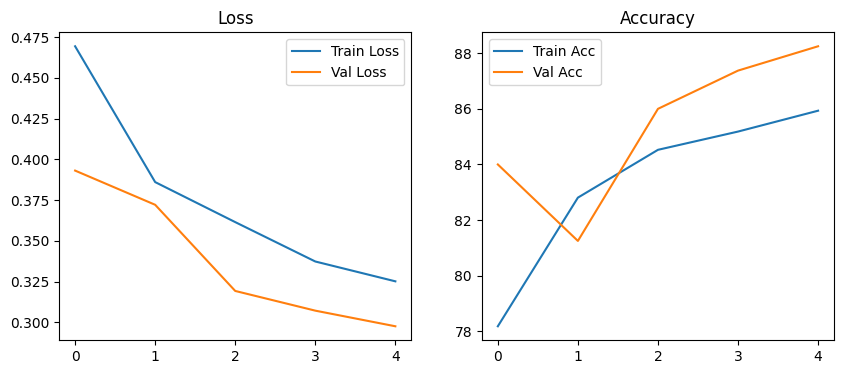

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os

# ======================
# Data Loaders
# ======================
data_dir = "/content/drive/MyDrive/Dataset"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   # MobileNetV2 input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transform=transform)
test_dataset  = datasets.ImageFolder(os.path.join(data_dir, "test"), transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=16, shuffle=False)

# ======================
# Model Setup
# ======================
from torchvision.models import mobilenet_v2, MobileNet_V2_Weights

weights = MobileNet_V2_Weights.DEFAULT
model = mobilenet_v2(weights=weights)

# Freeze all layers
for param in model.parameters():
    param.requires_grad = False

# Replace classifier for binary classification
model.classifier[1] = nn.Linear(model.last_channel, 2)

device = torch.device("cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[1].parameters(), lr=0.001)

# ======================
# Training Loop
# ======================
best_acc = 0.0
train_losses, test_losses = [], []
train_accs, test_accs = [], []

num_epochs = 5  # keep small for CPU

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = 100. * correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # ----------------------
    # Validation
    # ----------------------
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(test_dataset)
    val_acc = 100. * correct / total
    test_losses.append(val_loss)
    test_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}% "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Save best model
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "/content/drive/MyDrive/best_mobilenetv2.pth")
        print("💾 Best model saved!")

# ======================
# Visualization
# ======================
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Val Loss")
plt.legend(); plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(train_accs, label="Train Acc")
plt.plot(test_accs, label="Val Acc")
plt.legend(); plt.title("Accuracy")

plt.show()
